In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
sns.set()

In [2]:
directory = "dataset/Train_Titanic.csv"
training_set = pd.read_csv(directory)

In [3]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
training_set.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
training_set.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


# Step 2: Explore/Visualize dataset

In [6]:
survived = training_set[training_set['Survived'] == 1]
not_survived = training_set[training_set['Survived'] == 0]
print('Survived', len(survived))
print('Not Survived')

Survived 342
Not Survived


In [7]:
print('Total = ', len(training_set))
print('Number of passenger who survived = ', len(survived))
print("Number of passengers who did not survive = ", len(not_survived))

Total =  891
Number of passenger who survived =  342
Number of passengers who did not survive =  549


In [8]:
print('% of Survived = ', 1. * len(survived)/len(training_set) * 100)
print('% of did not survived = ', 1. * len(not_survived)/len(training_set) * 100)

% of Survived =  38.38383838383838
% of did not survived =  61.61616161616161


<Axes: xlabel='Pclass', ylabel='count'>

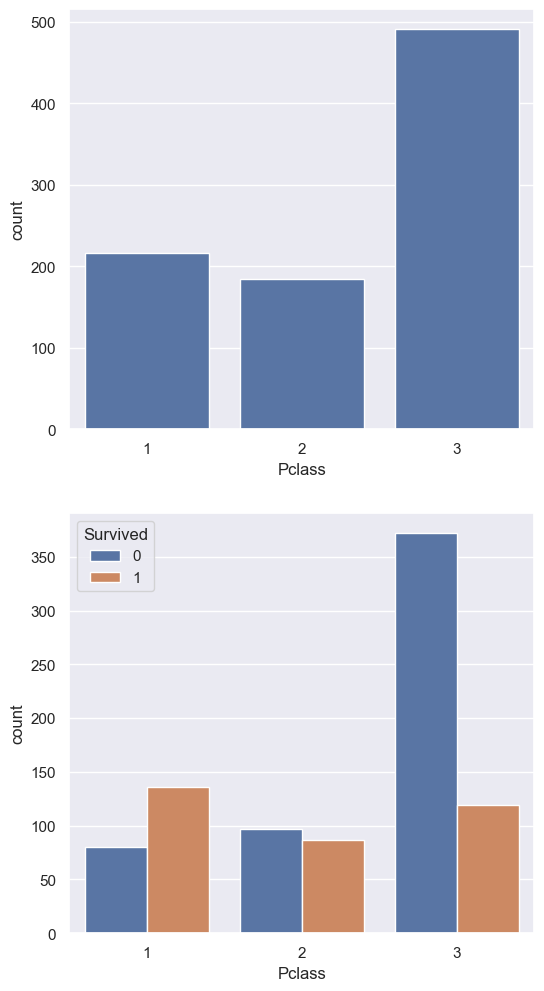

In [9]:
plt.figure(figsize = [6,12])
plt.subplot(211)
sns.countplot(x = 'Pclass', data = training_set)
plt.subplot(212)
sns.countplot(x = 'Pclass', data = training_set, hue='Survived')

<Axes: xlabel='SibSp', ylabel='count'>

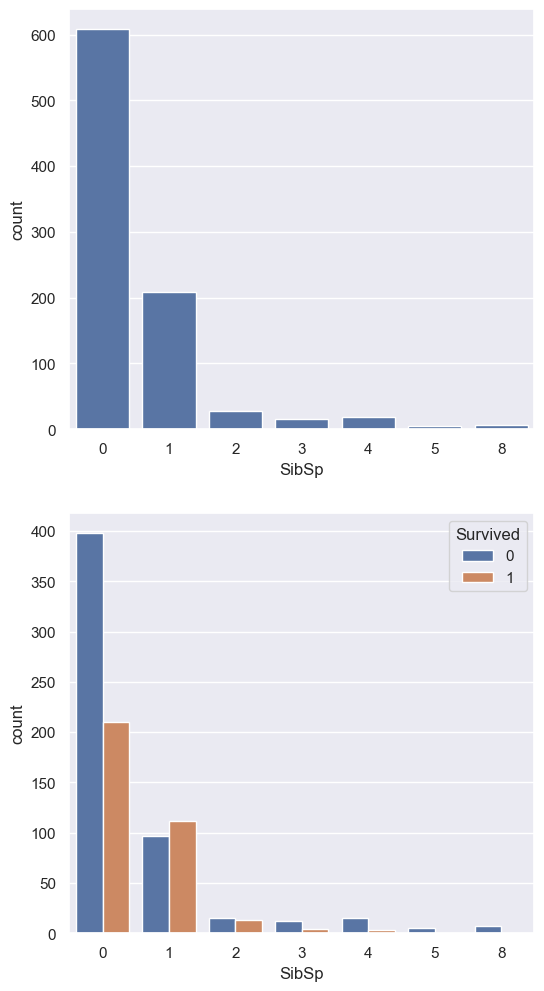

In [10]:
plt.figure(figsize = [6,12])
plt.subplot(211)
sns.countplot(x = 'SibSp', data = training_set)
plt.subplot(212)
sns.countplot(x = 'SibSp', data = training_set, hue='Survived')

<Axes: xlabel='Parch', ylabel='count'>

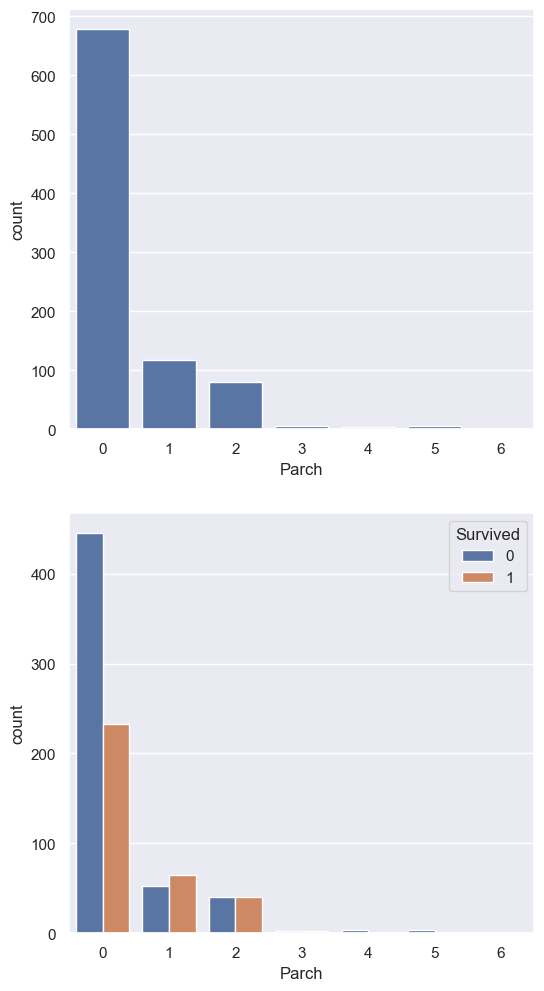

In [11]:
plt.figure(figsize = [6,12])
plt.subplot(211)
sns.countplot(x = 'Parch', data = training_set)
plt.subplot(212)
sns.countplot(x = 'Parch', data = training_set, hue='Survived')

<Axes: xlabel='Embarked', ylabel='count'>

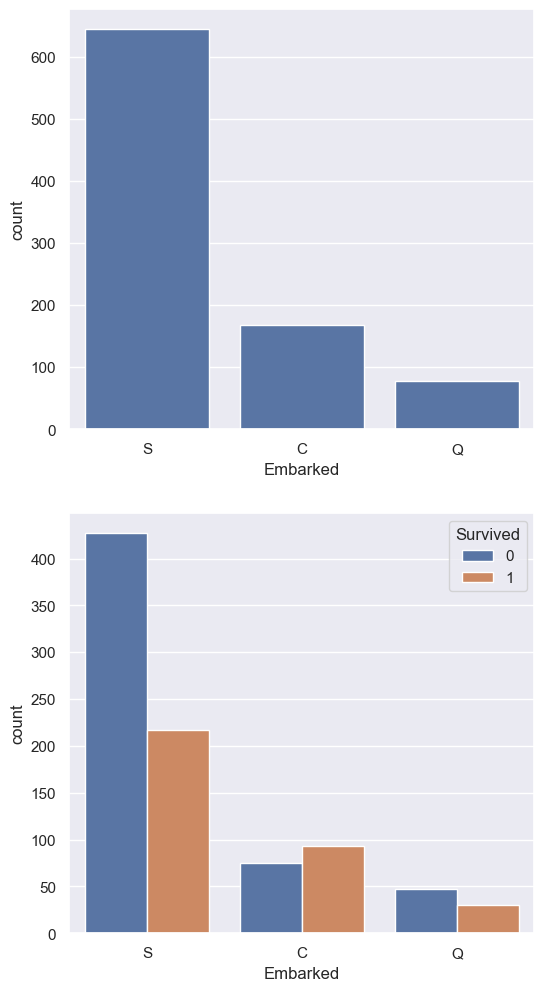

In [12]:
plt.figure(figsize = [6,12])
plt.subplot(211)
sns.countplot(x = 'Embarked', data = training_set)
plt.subplot(212)
sns.countplot(x = 'Embarked', data = training_set, hue='Survived')

<Axes: xlabel='Sex', ylabel='count'>

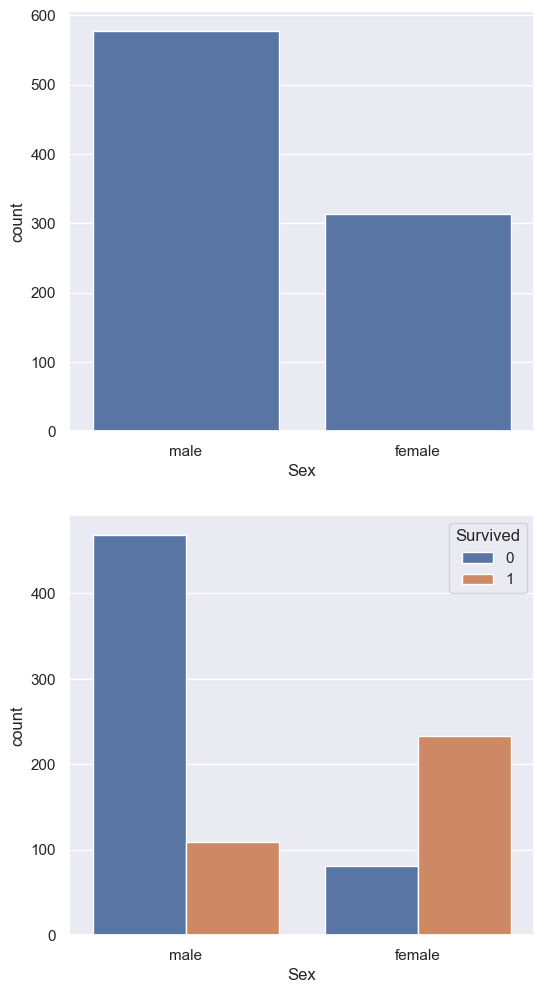

In [13]:
plt.figure(figsize = [6,12])
plt.subplot(211)
sns.countplot(x = 'Sex', data = training_set)
plt.subplot(212)
sns.countplot(x = 'Sex', data = training_set, hue='Survived')

<Axes: xlabel='Age', ylabel='count'>

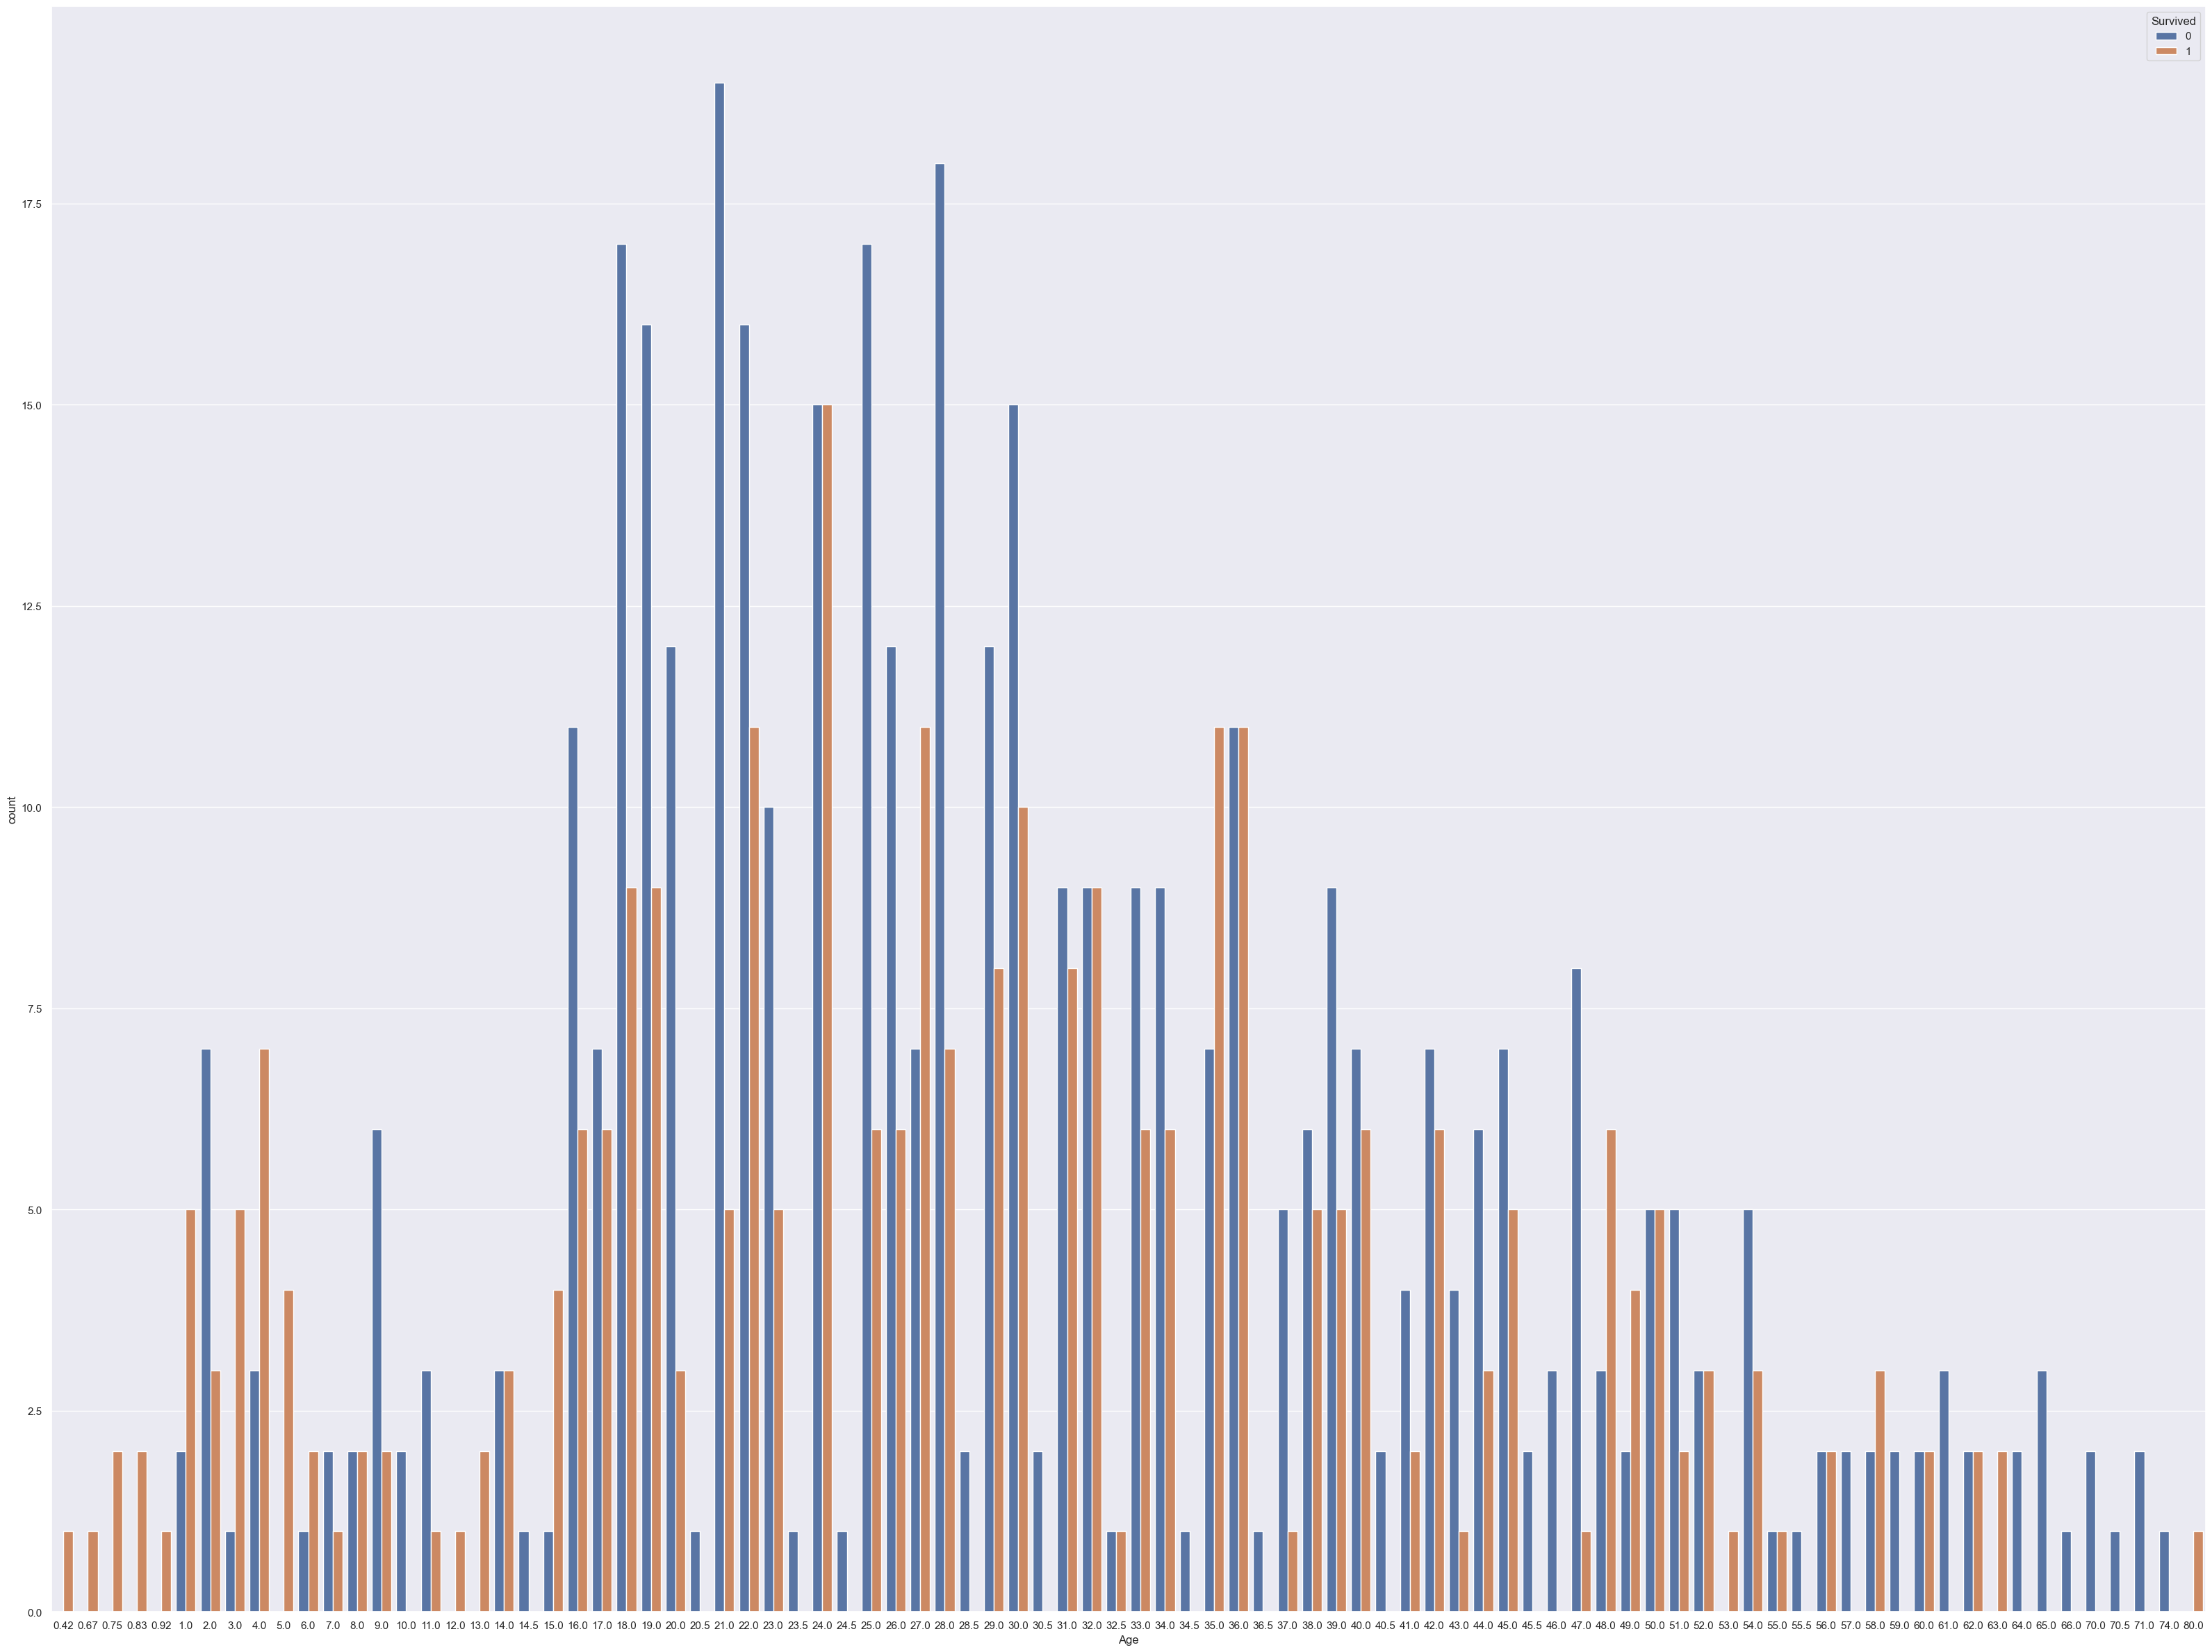

In [14]:
plt.figure(figsize = (40, 30))
sns.countplot(x = 'Age', hue = 'Survived', data = training_set)

<Axes: >

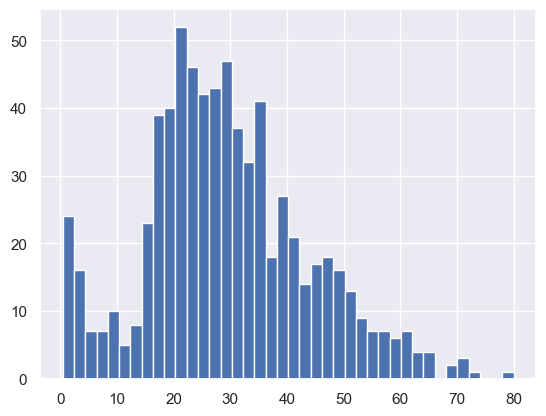

In [15]:
training_set['Age'].hist(bins = 40)

<Axes: xlabel='Fare', ylabel='count'>

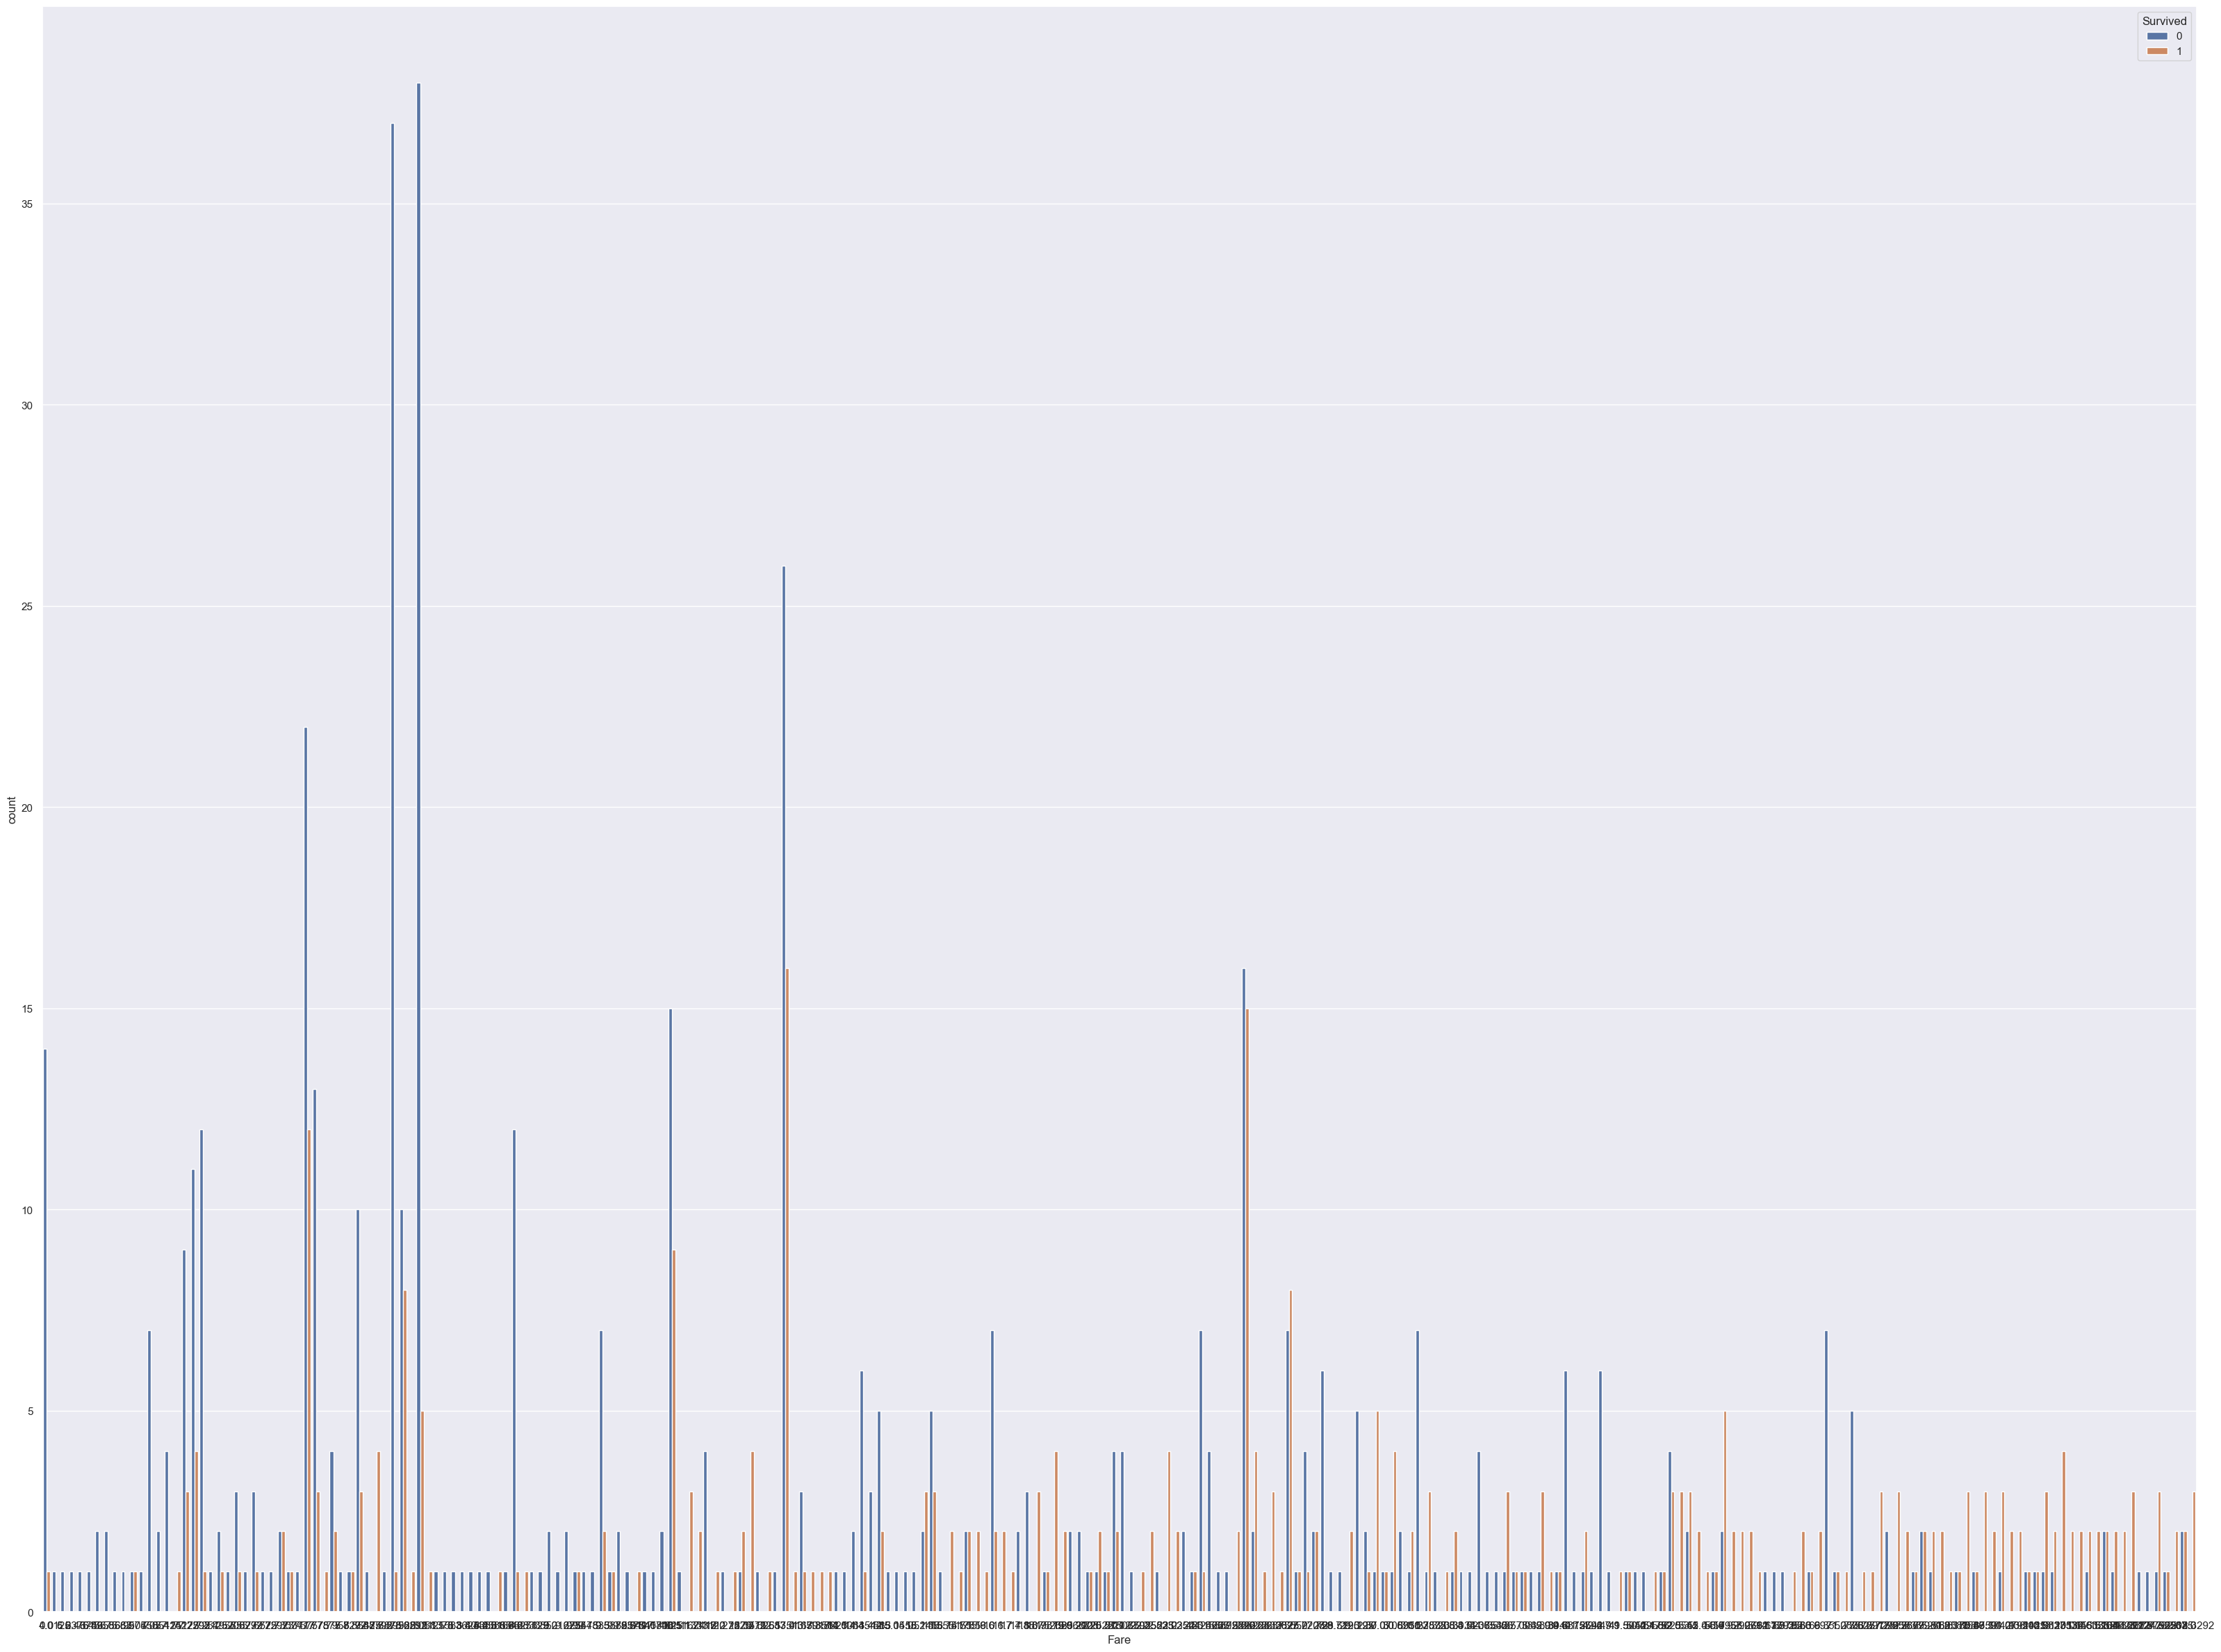

In [16]:
plt.figure (figsize = (40,30))
sns.countplot(x = 'Fare', hue = 'Survived', data = training_set)


<Axes: >

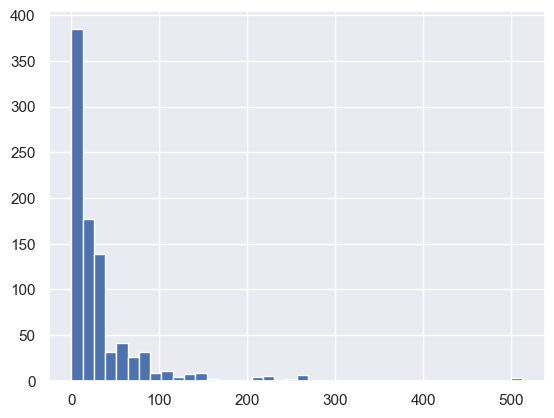

In [17]:
training_set['Fare'].hist(bins = 40)

# Step 3: Preparing the data for training/data cleaning

training_set.describe

<Axes: >

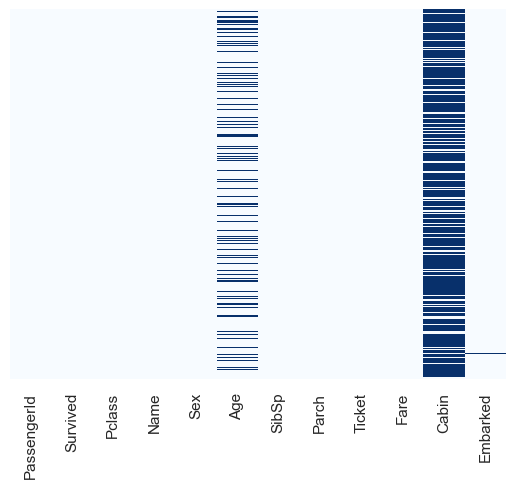

In [18]:
sns.heatmap(training_set.isnull(), yticklabels= False, cbar = False, cmap = 'Blues')

In [19]:
training_set.drop('Cabin', axis = 1, inplace = True)

In [20]:
training_set.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [21]:
training_set.drop(labels=['Ticket','Embarked', 'Name'], axis = 1, inplace = True)  

<Axes: >

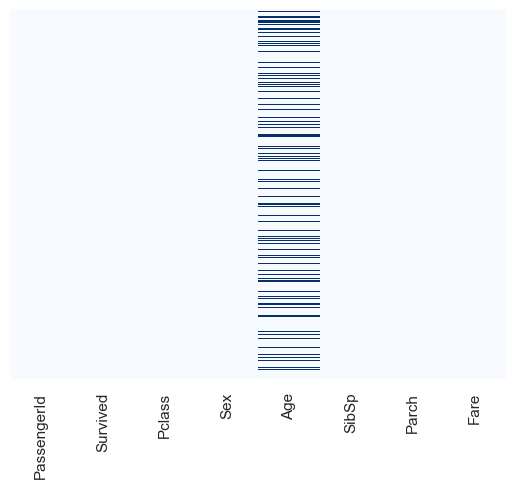

In [22]:
sns.heatmap(training_set.isnull(), yticklabels= False, cbar = False, cmap = 'Blues')

<Axes: xlabel='Sex', ylabel='Age'>

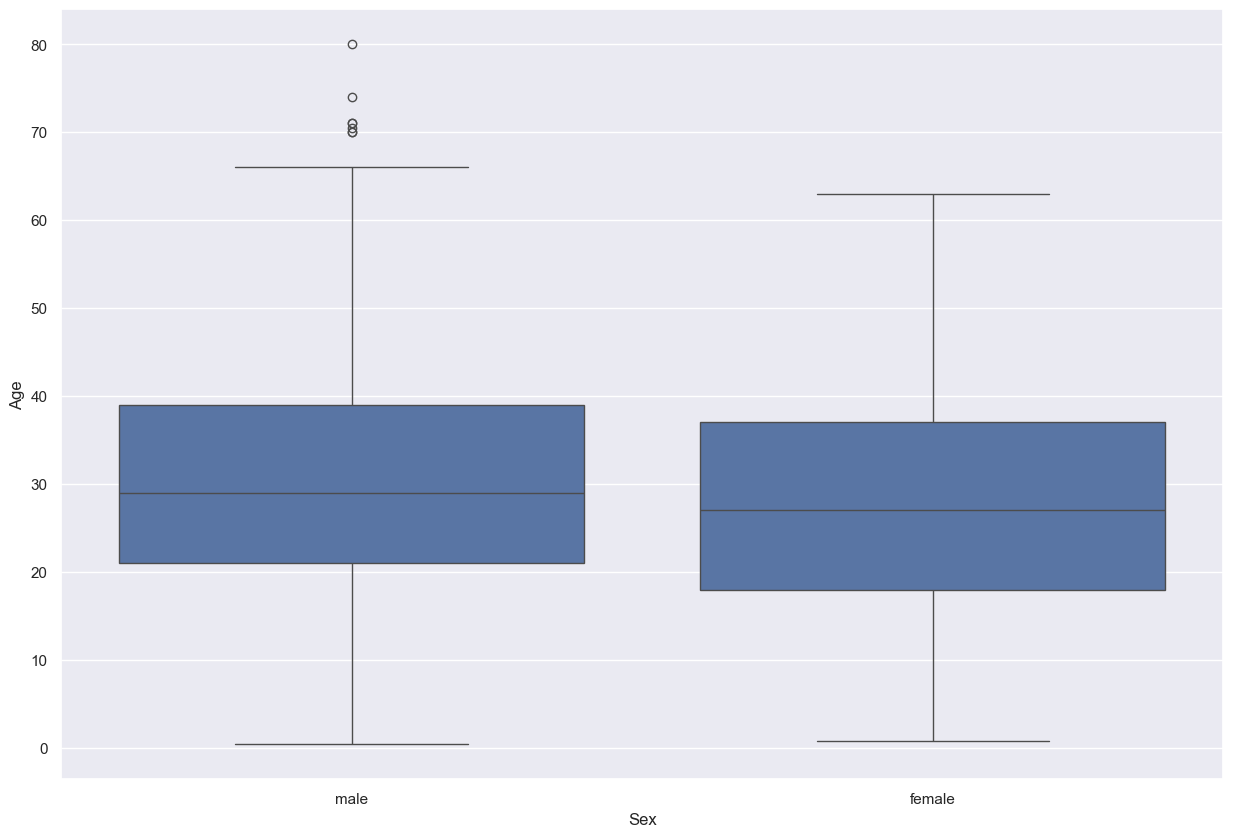

In [23]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Sex',y = 'Age', data=training_set )

In [24]:
test = training_set[['Age', 'Sex']]
age = training_set['Age']
sex = training_set['Sex']
test, sex.shape, age.shape

(      Age     Sex
 0    22.0    male
 1    38.0  female
 2    26.0  female
 3    35.0  female
 4    35.0    male
 ..    ...     ...
 886  27.0    male
 887  19.0  female
 888   NaN  female
 889  26.0    male
 890  32.0    male
 
 [891 rows x 2 columns],
 (891,),
 (891,))

In [25]:
training_set.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [26]:
male_median = training_set[training_set['Sex'] == 'male']['Age'].median()
male_median

29.0

In [27]:
female_median = training_set[training_set['Sex'] == 'female']['Age'].median()
female_median

27.0

In [28]:
def Fill_Age(data):
    age = data[0]
    sex = data[0]

    if pd.isnull(age):
        if sex == 'male':
            return male_median
        else:
            return female_median

    else:
        return age


In [29]:
training_set['Age'] = training_set[['Age', 'Sex']].apply(Fill_Age, axis = 1)

C:\Users\hassa\AppData\Local\Temp\ipykernel_24936\1382552905.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age = data[0]
C:\Users\hassa\AppData\Local\Temp\ipykernel_24936\1382552905.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sex = data[0]


<Axes: >

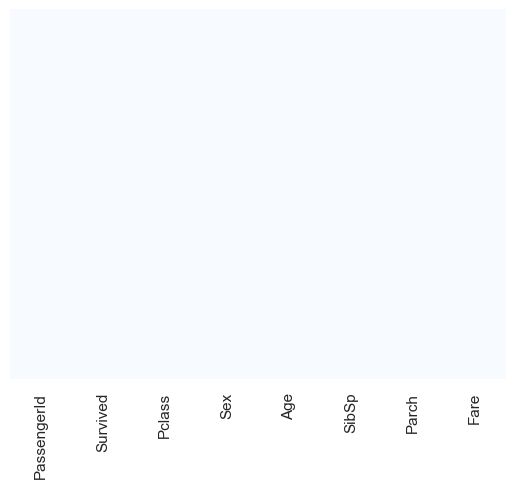

In [30]:
sns.heatmap(training_set.isnull(), yticklabels= False, cbar = False, cmap = 'Blues')

<Axes: >

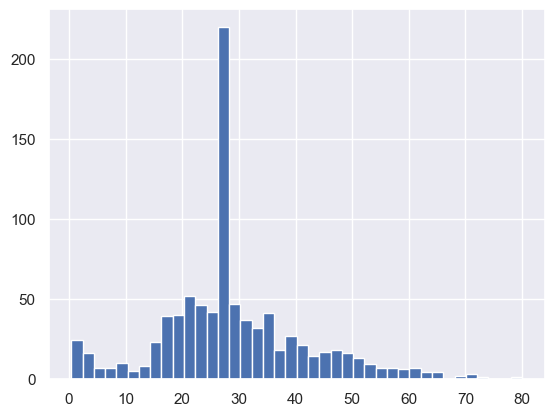

In [31]:
training_set['Age'].hist(bins = 40)

<Axes: >

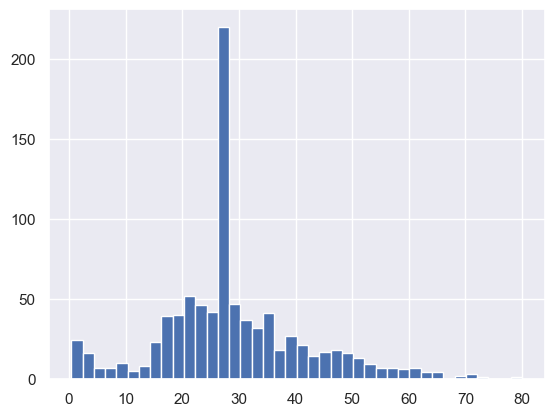

In [32]:
training_set['Age'].hist(bins = 40)

In [33]:
training_set.drop(labels = 'PassengerId', axis = 1, inplace = True)

In [34]:
training_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [35]:
training_set.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [36]:
male = pd.get_dummies(training_set['Sex'], drop_first = True).astype(int)

In [37]:
training_set.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [38]:
training_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [39]:
training_set = pd.concat([training_set, male], axis = 1)

In [40]:
training_set.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
male        0
dtype: int64

In [41]:
training_set.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,male
886,0,2,male,27.0,0,0,13.00,1
887,1,1,female,19.0,0,0,30.00,0
888,0,3,female,27.0,1,2,23.45,0
889,1,1,male,26.0,0,0,30.00,1
890,0,3,male,32.0,0,0,7.75,1


In [42]:
training_set = training_set[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch']].astype(int)

In [43]:
training_set.info

<bound method DataFrame.info of      Survived  Pclass  Age  SibSp  Parch
0           0       3   22      1      0
1           1       1   38      1      0
2           1       3   26      0      0
3           1       1   35      1      0
4           0       3   35      0      0
..        ...     ...  ...    ...    ...
886         0       2   27      0      0
887         1       1   19      0      0
888         0       3   27      1      2
889         1       1   26      0      0
890         0       3   32      0      0

[891 rows x 5 columns]>

In [44]:
training_set.isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
dtype: int64

In [45]:
X = training_set.drop('Survived', axis = 1)

In [46]:
X.head()

,Pclass,Age,SibSp,Parch
0,3,22,1,0
1,1,38,1,0
2,3,26,0,0
3,1,35,1,0
4,3,35,0,0


In [47]:
y = training_set['Survived'].values

In [48]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

 # Step 5: Model testing

In [51]:
y_predict = classifier.predict(X_test)

In [52]:
df = pd.DataFrame({'y_predict': y_predict, 'X_test' : y_test})

In [53]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)

<Axes: >

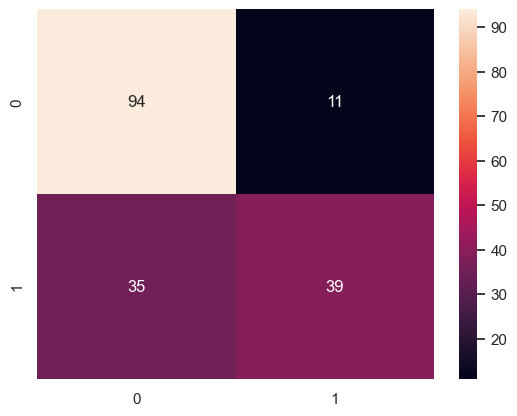

In [54]:
sns.heatmap(cm, annot=True, fmt = '.0f')

In [55]:
cm[0][0]

94

In [56]:
(cm[0][0] + cm[1][1])/ (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])

0.7430167597765364

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.73      0.90      0.80       105
           1       0.78      0.53      0.63        74

    accuracy                           0.74       179
   macro avg       0.75      0.71      0.72       179
weighted avg       0.75      0.74      0.73       179



In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=100)
clf = LogisticRegression(random_state=100)
clf.fit(X_train, y_train)

LogisticRegression(random_state=100)

In [59]:
predicted_y = clf.predict(X_test)

In [60]:
cp = classification_report(y_test, predicted_y)
cm = confusion_matrix(y_test, predicted_y)

In [61]:
cm = confusion_matrix(y_test, predicted_y)
cm[0]

array([117,  10], dtype=int64)

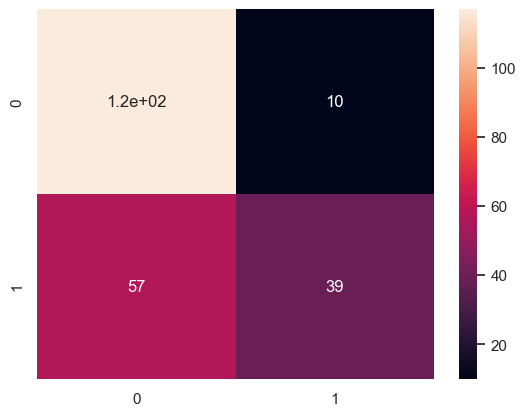

In [62]:
heatmap_cm = sns.heatmap(cm, annot = True)

In [63]:
print(classification_report(y_pred=predicted_y,y_true=y_test))

              precision    recall  f1-score   support

           0       0.67      0.92      0.78       127
           1       0.80      0.41      0.54        96

    accuracy                           0.70       223
   macro avg       0.73      0.66      0.66       223
weighted avg       0.73      0.70      0.67       223



In [64]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [65]:
titanic = pd.read_csv('dataset/Train_Titanic.csv')

In [66]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
data = titanic.copy()

In [68]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})

In [70]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [71]:
cleaned_data = data.drop(labels={'PassengerId', 'Name', 'Embarked', 'Cabin', 'Ticket', 'Parch', 'Fare'}, axis =1)
cleaned_data

,Survived,Pclass,Sex,Age,SibSp
0,0,3,1,22.0,1
1,1,1,0,38.0,1
2,1,3,0,26.0,0
3,1,1,0,35.0,1
4,0,3,1,35.0,0
...,...,...,...,...,...
886,0,2,1,27.0,0
887,1,1,0,19.0,0
888,0,3,0,NaN,1
889,1,1,1,26.0,0


In [72]:
male_median = cleaned_data[cleaned_data['Sex'] == 1]['Age'].median()
female_median = cleaned_data[cleaned_data['Sex'] == 0]['Age'].median()

def fill_missing_data(data):
    age = data[0]
    sex = data[1]

    if pd.isnull(age):
        if sex == 1:
            return male_median
        else:
            return female_median
    else:
        return age

In [73]:
cleaned_data.head()

,Survived,Pclass,Sex,Age,SibSp
0,0,3,1,22.0,1
1,1,1,0,38.0,1
2,1,3,0,26.0,0
3,1,1,0,35.0,1
4,0,3,1,35.0,0


In [74]:
cleaned_data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
dtype: int64

In [75]:
cleaned_data['Age'] = cleaned_data[['Age', 'Sex']].apply(fill_missing_data, axis = 1)
cleaned_data.head()

C:\Users\hassa\AppData\Local\Temp\ipykernel_24936\893482599.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age = data[0]
C:\Users\hassa\AppData\Local\Temp\ipykernel_24936\893482599.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sex = data[1]


,Survived,Pclass,Sex,Age,SibSp
0,0,3,1,22.0,1
1,1,1,0,38.0,1
2,1,3,0,26.0,0
3,1,1,0,35.0,1
4,0,3,1,35.0,0


In [76]:
cleaned_data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
dtype: int64

In [77]:
x1 = cleaned_data.drop('Survived', axis = 1)
y = cleaned_data['Survived']

In [78]:
x = sm.add_constant(x1)

In [79]:
reg_log = sm.Logit(y, x)

In [80]:
# After a maximum number of iterations, the model stops learning (max 35)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.443625
         Iterations 6


# Summary

In [81]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Wed, 23 Apr 2025   Pseudo R-squ.:                  0.3338
Time:                        16:57:40   Log-Likelihood:                -395.27
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.921e-84
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2008      0.478     10.877      0.000       4.264       6.138
Pclass        -1.1805      0.120     -9.807      0.000      -1.416      -0.945
Sex           -2.7261      0.194    -14.065      0.000      -3.106      -2.346
Age           -0.0402      0.008     -5.159      0.000      -0.055      -0.025
SibSp         -0.3576      0.103     -3.456      0.001      -0.560      -0.155
==============================================================================
"""

In [82]:
results_log.predict()

array([0.09044455, 0.89436957, 0.64901787, 0.9052259 , 0.07778011,
       0.09692513, 0.29419465, 0.0979783 , 0.63981311, 0.87211223,
       0.75785419, 0.84426235, 0.13350475, 0.04782769, 0.74965773,
       0.65255138, 0.07060399, 0.2589691 , 0.51407373, 0.63981311,
       0.21545279, 0.22232075, 0.74204329, 0.54224192, 0.56590232,
       0.4440124 , 0.09692513, 0.36778089, 0.63981311, 0.09692513,
       0.42245795, 0.92943637, 0.63981311, 0.0732576 , 0.45309227,
       0.32069257, 0.09692513, 0.12892565, 0.55502343, 0.67682789,
       0.42427769, 0.80179171, 0.09692513, 0.91385625, 0.71011203,
       0.09692513, 0.06982229, 0.63981311, 0.04987953, 0.6407324 ,
       0.0585077 , 0.12892565, 0.84478643, 0.78871325, 0.21131973,
       0.53225502, 0.88038884, 0.09869756, 0.90731744, 0.0356897 ,
       0.12448105, 0.92370098, 0.29502411, 0.09110339, 0.53225502,
       0.06982229, 0.84220707, 0.13822068, 0.38842183, 0.05591084,
       0.23652089, 0.31619046, 0.32520386, 0.07806689, 0.08687

In [83]:
np.array(data['Survived'])

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [84]:
results_log_df = pd.DataFrame(results_log.pred_table())
results_log_df.columns = ['Predicted 0', 'Predicted 1']
results_log_df

,Predicted 0,Predicted 1
0,459.0,90.0
1,98.0,244.0


In [85]:
cm  = np.array(results_log_df)
acuracy_train = (cm[0,0] + cm[1,1])/cm.sum()
acuracy_train

0.7890011223344556

In [86]:
df_test = pd.read_csv("dataset/Test_Titanic.csv")

In [87]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
